In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import string
import pickle

In [2]:
df = pd.read_csv('emotion-labels-test.csv')

In [3]:
#df.rename({'im feeling rather rotten so im not very ambitious right now;sadness':'text'}, axis=1, inplace=True)

In [4]:
df

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy
...,...,...
3137,Why does Candice constantly pout #GBBO 💄😒,sadness
3138,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness
3139,"@AceOperative789 no pull him afew weeks ago, s...",sadness
3140,I'm buying art supplies and I'm debating how s...,sadness


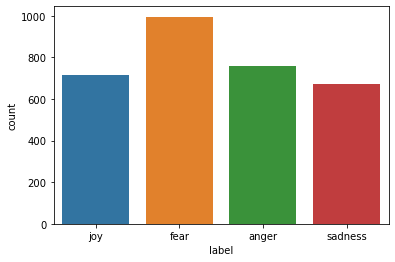

In [5]:
sns.countplot(data=df, x='label')

In [6]:
#Let's see if the length of the message affects the label 
df['text_len'] = df['text'].apply(lambda x: len(x))
df_bylabel = df.groupby('label').sum()

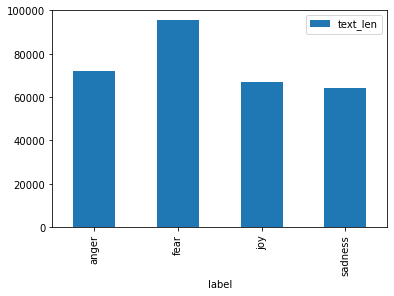

In [7]:
df_bylabel.plot.bar()
#We see the same distribution per category

In [8]:
#Let's process the data
for i in df['text']: 
    if '' in i:
        print('punc') 

punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc
punc


In [9]:
df = df.applymap(str)

In [10]:
lemmatizer = WordNetLemmatizer()

#Convert emojis to words 
with open('Emoji_Dict.p', 'rb') as fp:
        Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(mess):
    for emot in Emoji_Dict:
        mess = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), mess)
    return mess

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    #Convert emojis to words
    mess = convert_emojis_to_word(mess)

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    stop = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #Lemmatize
    lemma = []
    for lem in stop: 
        lemma.append(lemmatizer.lemmatize(lem, pos ="v"))

    return lemma

In [11]:
#Now let's tokenize the data
#df['text'] = df['text'].apply(text_process)

In [12]:
df.head()

,text,label,text_len
0,You must be knowing #blithe means (adj.) Happ...,joy,58
1,Old saying 'A #smile shared is one gained for ...,joy,82
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy,60
3,@Elaminova sparkling water makes your life spa...,joy,50
4,I'm tired of everybody telling me to chill out...,joy,125


In [14]:
#Time to create the Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])

In [ ]:
text_bow = bow_transformer.transform(df['text'])

In [ ]:
print('Shape of Sparse Matrix: ', text_bow.shape)
print('Amount of Non-Zero occurences: ', text_bow.nnz)

Shape of Sparse Matrix:  (1999, 1998)
Amount of Non-Zero occurences:  1999


In [ ]:
sparsity = (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(text_bow)
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(1999, 1998)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
sentiment_analysis_model = MultinomialNB().fit(text_tfidf, df['label'])

In [ ]:
all_predictions = sentiment_analysis_model.predict(text_tfidf)
print(all_predictions)

['sadness' 'sadness' 'joy' ... 'joy' 'joy' 'joy']


In [ ]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['text'], df['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

1599 400 1999


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000025A7CB4F310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         0
        fear       0.00      0.00      0.00         0
         joy       1.00      0.31      0.48       400
        love       0.00      0.00      0.00         0
     sadness       0.00      0.00      0.00         0
    surprise       0.00      0.00      0.00         0

    accuracy                           0.31       400
   macro avg       0.17      0.05      0.08       400
weighted avg       1.00      0.31      0.48       400



C:\Users\Kamen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Try RFC!
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=10,max_features=10)
vect = CountVectorizer()
msg_train_vect = vect.fit_transform(msg_train)
rfc.fit(msg_train_vect,label_train)
#msg_train

AttributeError: 'list' object has no attribute 'lower'